<h2><center>CS5785 Assignment 2 </center></h2>
      
         
   <center>by Eunsol Choi(ec897), Ling Zhong(lz555)</center>

# Binary Classification on Text Data(2/3)

## Goal: to tell if a tweet is announcing a natural disaster or not. Programmatically monitoring Twitter can contribute to detecting emergency situations. 
For training, we're using the 'disaster tweets' from kaggle 
dataset source: https://www.kaggle.com/c/nlp-getting-started/overview

### We used Ngram to vectorize the tweets after some preprocessing. It uses about 3239 vocabularies as features. Ran Bernoulli Naive Bayes, Logistic Regression, SVM, non-linear SVM. We compared f-1 scores of each.  

                    Naive Bayes, Bernoulli shows F1 score of 0.722719
                    Logistic regression classfier shows F1 score of 0.739179
                    LinearSVM classifier shows F1 score of 0.742138
                    nonLinearSVM classifier shows F1 score of 0.7390300


### Furthermore, we incorported more features from the original dataset for the Ngram. The dataset has 'keyword' and 'location' columns. We've added the keywords and location at the end of the tweet. It performed better. 


                    Logistic regression classfier shows F1 score of 0.746494
                    LinearSVM classifier shows F1 score of 0.665983
                    nonLinearSVM classifier shows F1 score of 0.7344632


# (i) Ngram
 - Using N = 2, construct feature representations of the tweets in the train and dev tweets
 - Discuss how you chose the threshold M
 - report the total number of 1-grams and 2-grams in your vocabulary
 - randomly sample 10 2-grams from your vocabulary, and print them out
 - repeat parts (e)-(h), and report the results. 
   Do these results differ significantly from those using the bag of words model? 
   Discuss what this implies about the task.

###  Using N = 2, construct feature representations of the tweets in the train and dev tweets


In [29]:
#https://scikit-learn.org/stable/modules/feature_extraction.html
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), \
                                     token_pattern=r'\b\w+\b', min_df=4)

X_2 = bigram_vectorizer.fit_transform(X_train['lemmatized']).toarray()
X_dev_2 = bigram_vectorizer.transform(X_dev['lemmatized']).toarray()

### Discuss how you chose the threshold M

We sampled and examined the frequency of the top 50% Ngrams and decide that M=4.

### the total number of 1-grams and 2-grams is 3239

In [30]:
X_2.shape
# X_dev_2.shape
#3259 features when min_df=4
#4570 features when min_df=3

(5329, 3239)

### random Ngram sample of 10: ['thunderstorm warning', 'caused structural', 'battle occurred', 'invoice make', 'flag via', 'bigger projected', 'chemical dependency', 'incident injury', 'aftershock dubstep', 'rise top']

- slightly different every time, according to how the train/dev set was randomly divided


In [33]:
# randomly sample 10 2-grams from your vocabulary, and print them out
import random

bigram_fnames = bigram_vectorizer.get_feature_names()

#extract only the 2-grams from the mixture
bigram_2gram = [word for word in bigram_fnames if len(word.split(" "))==2]
        
bigram_sample = random.sample(bigram_2gram, 10)

print(bigram_sample)

['thunderstorm warning', 'caused structural', 'battle occurred', 'invoice make', 'flag via', 'bigger projected', 'chemical dependency', 'incident injury', 'aftershock dubstep', 'rise top']


### applying different classifiers (e)~(h) with Ngram 
    Naive Bayes, Bernoulli shows F1 score of 0.722719
    Logistic Regression shows F1 score of 0.739179
    SVM at C = 0.04 shows F1 score of 0.742138
    

##### (e2)Naive Bayes Bernoulli with Ngram

In [34]:
# Naive Bayes Bernoulli classifier
#codes from CS5785 lecture note 8

n = X_2.shape[0] #dataset size
d = X_2.shape[1] #number of features in our dataset
K = 2 #number of classes. Here we have two: disaster, not disaste

#build empty vectors of corresponding shapes
psis = np.zeros([K,d])
phis = np.zeros([K])


#compute parameters and fill in the vectors for each class
for k in range(K):
    X_k = X_2[y_train == k]
    psis[k] = np.mean(X_k, axis=0) #feature probability 
    phis[k] = X_k.shape[0] / float(n) #class proportion
    

print("phis of each class:", phis)


def nb_predictions(x, psis, phis):
    #to compute \arg\max_y p(x|y)*p(y)
    
    #adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1 , n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    #clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)
    
    #compute log-probabilities 
    logpy = np.log(phis).reshape([K,1])
    logpxy = x*np.log(psis) + (1-x)*np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy
    
    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

x_pred, computedlogpyx = nb_predictions(X_dev_2, psis, phis)

f1(x_pred, y_dev, 'Naive Bayes, Bernoulli')

phis of each class: [0.56370801 0.43629199]
Naive Bayes, Bernoulli shows F1 score of 0.722719


0.7227191413237926

##### (f2) Log Reg with Ngram

In [39]:
# Fitting a simple Logistic Regression on BoW
logreg_bow = LogisticRegression(C=1.0)
lr_trained = logreg_bow.fit(X_2, y_train)

#metrics
lr_x_pred = lr_trained.predict(X_dev_2)

f1(lr_x_pred, y_dev, 'Logistic Regression')
print_top10(bigram_vectorizer, lr_trained, class_labels)

Logistic Regression shows F1 score of 0.739179
The top ten feature names are:
0: japan, casualty, derailment, flood, storm, drought, typhoon, earthquake, wildfire, hiroshima
1: japan, casualty, derailment, flood, storm, drought, typhoon, earthquake, wildfire, hiroshima


##### (g2) LinearSVM Classifier with Ngram

When C=  0.001
LinearSVM Classifier shows F1 score of 0.528926
When C=  0.01
LinearSVM Classifier shows F1 score of 0.724305
When C=  0.02
LinearSVM Classifier shows F1 score of 0.728983
When C=  0.04
LinearSVM Classifier shows F1 score of 0.742138
When C=  0.06
LinearSVM Classifier shows F1 score of 0.740657
When C=  0.08
LinearSVM Classifier shows F1 score of 0.738617
When C=  0.1
LinearSVM Classifier shows F1 score of 0.736607
When C=  0.2
LinearSVM Classifier shows F1 score of 0.728368
When C=  1.0
LinearSVM Classifier shows F1 score of 0.708928
When C=  10.0
LinearSVM Classifier shows F1 score of 0.683325


/Users/dd/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


When C=  100.0
LinearSVM Classifier shows F1 score of 0.662950


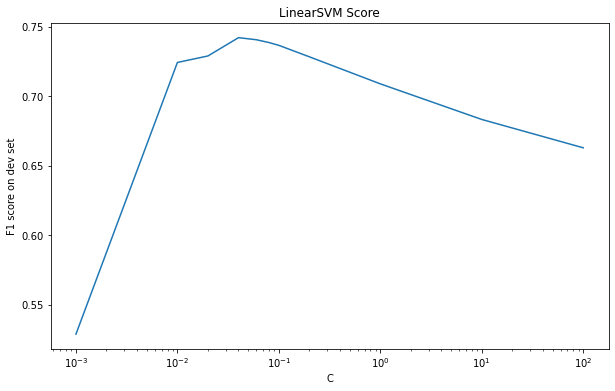

C = 0.04  yields the best classification performance with F1-score of 0.742138
The top ten feature names are:
0: derailment, typhoon, massacre, casualty, flood, storm, drought, earthquake, wildfire, hiroshima
1: derailment, typhoon, massacre, casualty, flood, storm, drought, earthquake, wildfire, hiroshima


In [40]:

C_range= [0.001, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 1.0, 10.0, 100.0]
F1_lsvm = {}

#train and test
C=0
for C in C_range:
    lsvm = LinearSVC(C=C, tol=1e-4,dual=False,random_state=0)
    lsvm.fit(X_2, y_train)
    lsvm_pred = lsvm.predict(X_dev_2)
    #calculate F1
    print('When C= ', C)
    F1_lsvm[C] = f1(lsvm_pred, y_dev, 'LinearSVM Classifier')
    
    if C == max(F1_lsvm, key=F1_lsvm.get):
        lsvm_best_estimator = lsvm
        lsvm_bestC = C
        
#plot the F1 score figure

def lsvm_plot (C_range, F1_lsvm):  
    plt.subplots(figsize=(10,6))
    plt.plot(C_range, F1_lsvm.values())
    plt.xlabel('C') 
    plt.ylabel('F1 score on dev set') 
    plt.xscale("log")
    plt.title('LinearSVM Score') 
    plt.show() 

lsvm_plot(C_range, F1_lsvm)

#compare the best parameter with Linear Regression Classifier
print('C =', lsvm_bestC,' yields the best classification performance with F1-score of {:4f}'.format(F1_lsvm[lsvm_bestC]))

print_top10(bigram_vectorizer, lsvm_best_estimator, lsvm.classes_)

### We can see that the best LinearSVM classifier (F1-score=0.742138) slightly underperforms the logistic regression classfier (F1-score = 0.739179).
### applying different classifiers (e)~(h) with Ngram 


### According to our LinearSVM classifier, the Top 10 words for deciding whether a tweet is about a real disaster or not are:
<font color=orange size=4.9><b> [ massacre, bombing, hailstorm, case, flood, evacuated, earthquake, storm, hiroshima, wildfire ]</b> </font>
### Comparing with the Top 10 most important keywords of LR classifier:
<font color=orange size=4.9><b> [ case, derailment, hailstorm, evacuated, flood, bombing, earthquake, storm, hiroshima, wildfire ]</b></font>
### we can see that 9 out of 10 of the keywords are the same for both classifier. The only different word is <font color=blue> derailment </font> vs <font color=blue> massacre </font>

##### (h2) Non-linear SVM Classifier with Ngram

After adopting Ngram model, the runtime of the Rbf-kernel SVM classifer has become significantly slower, almost 100 times slower(it takes us almost 30mins to run the 3x3 gridsearch), as it is known to be computationally expensive to run on high dimension. So I had to significantly shrink the extent of gridsearch(a range closer to previous optimal hyperparameters), otherwise it's not feasible.

In [41]:
# print('running')
C_list = list(10. ** np.arange(0, 3))
gamma_list = list(10. ** np.arange(-3, 0))
F1_rbfsvm = np.zeros((len(C_list), len(gamma_list)))
F1_rbfsvm_best = 0
print('running')
#train and test

for i in range(len(C_list)):
    for j in range(len(gamma_list)):
        C=C_list[i]
        gamma=gamma_list[j]    
        rbfsvm = SVC(kernel= 'rbf', C=C, gamma=gamma, random_state=0)
        rbfsvm.fit(X_2, y_train)
        rbfsvm_pred = rbfsvm.predict(X_dev_2)
        #calculate F1
        print('When C= ', C, 'gamma=',gamma)
        F1_rbfsvm[i][j] = f1(rbfsvm_pred, y_dev, 'Rbf-SVM Classifier')

        if F1_rbfsvm[i,j] > F1_rbfsvm_best:
            F1_rbfsvm_best = F1_rbfsvm[i][j]
            rbfsvm_best_estimator = rbfsvm
            rbfsvm_bestC = C
            best_i = i
            rbfsvm_bestgamma = gamma
            best_j = j

print('Best C=',rbfsvm_bestC,'Best gamma=',rbfsvm_bestgamma,'best f1 score= ', F1_rbfsvm_best)
rbfsvm_heatpmap(gamma_list, C_list, F1_rbfsvm, best_i, best_j)

running
When C=  1.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.063460
When C=  1.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.624571
When C=  1.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.730905
When C=  10.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.636364
When C=  10.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.738854
When C=  10.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.738328
When C=  100.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.739030
When C=  100.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.717565
When C=  100.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.713128
Best C= 100.0 Best gamma= 0.001 best f1 score=  0.7390300230946883


NameError: name 'rbfsvm_heatpmap' is not defined

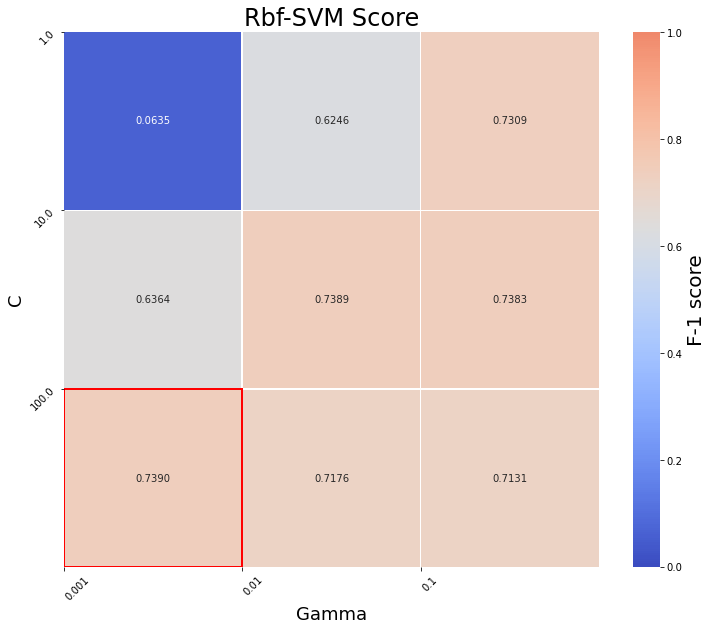

In [43]:
rbfsvm_heatpmap(gamma_list, C_list, F1_rbfsvm, best_i, best_j)

# (j) Incorporating the additional columns.

    Append WORDS to the tweet,and re-calculatethe bag of words or N -grams features
    Create new categorical features corresponding tothe different values these columns
    could take, and append these to the bag of words or N -grams features.

In [42]:

#reopen the train dataset to work with the entire 'keyword' and 'location' column 
train = pd.read_csv('train.csv')
y = train.pop('target').values
X1 = train

"""dealing with null values. Fill in with '0' which will be stripped later"""

#Check null values 61/2533
X1.isnull().sum()
X1 = X1.fillna('0')
# print(X['keyword'].value_counts())
# print(X['location'].value_counts())


"""preprocessing for keyword and location"""

#=====cleaning keyword =======

#punctuations, hashtags, and numbers 
X1['keyword'] = X1['keyword'].str.replace("[^a-zA-Z0-9]"," ")
X1['keyword'] = X1['keyword'].str.replace('\d+', '')
#lowercase
X1['keyword'] = X1['keyword'].str.lower()

#=====cleaning location =======

#stripURL,mention,punctuations, hashtags, and numbers 
X1['location'] = X1['location'].str.replace("[^a-zA-Z0-9]"," ")
X1['location'] = X1['location'].str.replace('\d+', '')
#lowercase
X1['location'] = X1['location'].str.lower()



"""tokenize and lemmatize keyword and location"""

X1['keyword'] = X1['keyword'].apply(lambda x:tokenize(x))
X1['location'] = X1['location'].apply(lambda x:tokenize(x))
X1['processed_keyword'] = X1['keyword'].apply(lambda x:wordLem(x))
X1['processed_location'] = X1['location'].apply(lambda x:wordLem(x))


"""Appending processed keyword and locatoin to the text"""

print("\n before appending: \n", X1['text'][1114])

X1['newtext'] = X1['text'] + ' ' +  X1['processed_keyword'] + ' ' + X1['processed_location']

print("\n after appending: \n", X1['newtext'][1114])


 before appending: 
 .@RaniaKhalek true. I faced everything from 'Is Bin Laden your uncle?' to 'Hopefully Afghanistan will be bombed'. Children can be very ugly.

 after appending: 
 .@RaniaKhalek true. I faced everything from 'Is Bin Laden your uncle?' to 'Hopefully Afghanistan will be bombed'. Children can be very ugly. bombed kabul tuebingen innsbruck


In [43]:
X1.head()

,id,keyword,location,text,processed_keyword,processed_location,newtext
0,1,[],[],Our Deeds are the Reason of this #earthquake M...,,,Our Deeds are the Reason of this #earthquake M...
1,4,[],[],Forest fire near La Ronge Sask. Canada,,,Forest fire near La Ronge Sask. Canada
2,5,[],[],All residents asked to 'shelter in place' are ...,,,All residents asked to 'shelter in place' are ...
3,6,[],[],"13,000 people receive #wildfires evacuation or...",,,"13,000 people receive #wildfires evacuation or..."
4,7,[],[],Just got sent this photo from Ruby #Alaska as ...,,,Just got sent this photo from Ruby #Alaska as ...


In [44]:
X1['key_loc_added'] = X1['processed_keyword'] + ' ' + X1['processed_location']
added = pd.DataFrame(X1['key_loc_added'])
X = pd.concat([X,added], axis=1)
X.head()

,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized,key_loc_added
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake m...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deed reason earthquake may allah forgive u,
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",resident asked shelter place notified officer ...,
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfire evacuation order calif...,
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...,


In [45]:
X['newtext'] = X['lemmatized'] + ' ' +  X['key_loc_added']
X.head()

,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized,key_loc_added,newtext
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake m...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deed reason earthquake may allah forgive u,,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",resident asked shelter place notified officer ...,,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfire evacuation order calif...,,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...,,got sent photo ruby alaska smoke wildfire pour...


#### Re-make the Ngram

In [46]:
# split the train and dev with the combined X 
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.70,test_size=0.30)
print("train data: ",X_train.shape)
print("dev data: ",X_dev.shape)

train data:  (5329, 10)
dev data:  (2284, 10)


In [47]:

#reopen the train dataset to work with the entire 'keyword' and 'location' column 
train = pd.read_csv('train.csv')
y = train.pop('target').values
X1 = train

"""dealing with null values. Fill in with '0' which will be stripped later"""

#Check null values 61/2533
X1.isnull().sum()
X1 = X1.fillna('0')
# print(X['keyword'].value_counts())
# print(X['location'].value_counts())


"""preprocessing for keyword and location"""

#=====cleaning keyword =======

#punctuations, hashtags, and numbers 
X1['keyword'] = X1['keyword'].str.replace("[^a-zA-Z0-9]"," ")
X1['keyword'] = X1['keyword'].str.replace('\d+', '')
#lowercase
X1['keyword'] = X1['keyword'].str.lower()

#=====cleaning location =======

#stripURL,mention,punctuations, hashtags, and numbers 
X1['location'] = X1['location'].str.replace("[^a-zA-Z0-9]"," ")
X1['location'] = X1['location'].str.replace('\d+', '')
#lowercase
X1['location'] = X1['location'].str.lower()



"""tokenize and lemmatize keyword and location"""

X1['keyword'] = X1['keyword'].apply(lambda x:tokenize(x))
X1['location'] = X1['location'].apply(lambda x:tokenize(x))
X1['processed_keyword'] = X1['keyword'].apply(lambda x:wordLem(x))
X1['processed_location'] = X1['location'].apply(lambda x:wordLem(x))


"""Appending processed keyword and locatoin to the text"""

print("\n before appending: \n", X1['text'][1114])

X1['newtext'] = X1['text'] + ' ' +  X1['processed_keyword'] + ' ' + X1['processed_location']

print("\n after appending: \n", X1['newtext'][1114])


 before appending: 
 .@RaniaKhalek true. I faced everything from 'Is Bin Laden your uncle?' to 'Hopefully Afghanistan will be bombed'. Children can be very ugly.

 after appending: 
 .@RaniaKhalek true. I faced everything from 'Is Bin Laden your uncle?' to 'Hopefully Afghanistan will be bombed'. Children can be very ugly. bombed kabul tuebingen innsbruck


In [48]:
X_2_re = bigram_vectorizer.fit_transform(X_train['newtext']).toarray()
X_dev_2_re = bigram_vectorizer.transform(X_dev['newtext']).toarray()

#### Logistic Regression with Re-made Ngram
    Logistic Regression shows F1 score of 0.746494

In [130]:
# Fitting a simple Logistic Regression on new Ngram bow
logreg_bow = LogisticRegression(C=1.0)
lr_trained = logreg_bow.fit(X_2_re, y_train)

#metrics
lr_x_pred = lr_trained.predict(X_dev_2_re)

f1(lr_x_pred, y_dev, 'Logistic Regression')
print_top10(bigram_vectorizer, lr_trained, class_labels)

Logistic Regression shows F1 score of 0.735182
The top ten feature names are:
0: palo, fatal, church, hostage, blown away, pm wreckage, perhaps, continue, property casualty, evil
1: palo, fatal, church, hostage, blown away, pm wreckage, perhaps, continue, property casualty, evil


#### LinearSVM with Re-made Ngram

When C=  0.001
LinearSVM Classifier shows F1 score of 0.628832
When C=  0.01
LinearSVM Classifier shows F1 score of 0.726757
When C=  0.02
LinearSVM Classifier shows F1 score of 0.735196
When C=  0.04
LinearSVM Classifier shows F1 score of 0.734107
When C=  0.06
LinearSVM Classifier shows F1 score of 0.731384
When C=  0.08
LinearSVM Classifier shows F1 score of 0.731065
When C=  0.1
LinearSVM Classifier shows F1 score of 0.733115
When C=  0.2
LinearSVM Classifier shows F1 score of 0.722762
When C=  1.0
LinearSVM Classifier shows F1 score of 0.694371
When C=  10.0
LinearSVM Classifier shows F1 score of 0.668731


c:\users\hr\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


When C=  100.0
LinearSVM Classifier shows F1 score of 0.665983


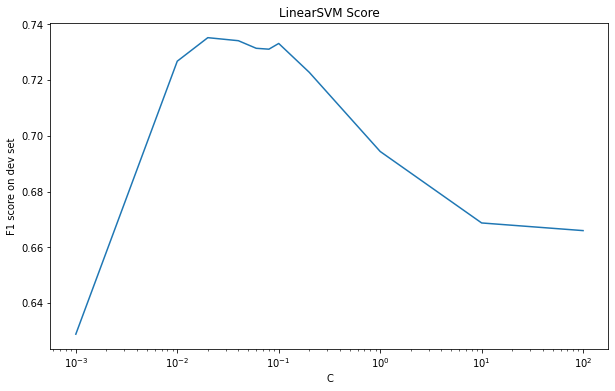

C = 0.02  yields the best classification performance with F1-score of 0.735196
The top ten feature names are:
0: evacuated, derailment, massacre, drought, flood, train, typhoon, earthquake, wildfire, hiroshima
1: evacuated, derailment, massacre, drought, flood, train, typhoon, earthquake, wildfire, hiroshima


In [50]:

C_range= [0.001, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 1.0, 10.0, 100.0]
F1_lsvm = {}

#train and test
C=0
for C in C_range:
    lsvm = LinearSVC(C=C, tol=1e-4,dual=False,random_state=0)
    lsvm.fit(X_2_re, y_train)
    lsvm_pred = lsvm.predict(X_dev_2_re)
    #calculate F1
    print('When C= ', C)
    F1_lsvm[C] = f1(lsvm_pred, y_dev, 'LinearSVM Classifier')
    
    if C == max(F1_lsvm, key=F1_lsvm.get):
        lsvm_best_estimator = lsvm
        lsvm_bestC = C
        
#plot the F1 score figure

def lsvm_plot (C_range, F1_lsvm):  
    plt.subplots(figsize=(10,6))
    plt.plot(C_range, F1_lsvm.values())
    plt.xlabel('C') 
    plt.ylabel('F1 score on dev set') 
    plt.xscale("log")
    plt.title('LinearSVM Score') 
    plt.show() 

lsvm_plot(C_range, F1_lsvm)

#compare the best parameter with Linear Regression Classifier
print('C =', lsvm_bestC,' yields the best classification performance with F1-score of {:4f}'.format(F1_lsvm[lsvm_bestC]))

print_top10(bigram_vectorizer, lsvm_best_estimator, lsvm.classes_)

#### Non-linear SVM with Re-made Ngram
As mentioned before, it has become very computationally expensive to run Rbf-kernel SVM with the additional feature. So we had to shrink the extent of the gridsearch (a range closer to previous optimal hyperparameter)

running
When C=  1.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.200371
When C=  1.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.689116
When C=  1.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.734463
When C=  10.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.697400
When C=  10.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.723239
When C=  10.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.709258
When C=  100.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.721330
When C=  100.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.700792
When C=  100.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.709642
Best C= 1.0 Best gamma= 0.1 best f1 score=  0.7344632768361581


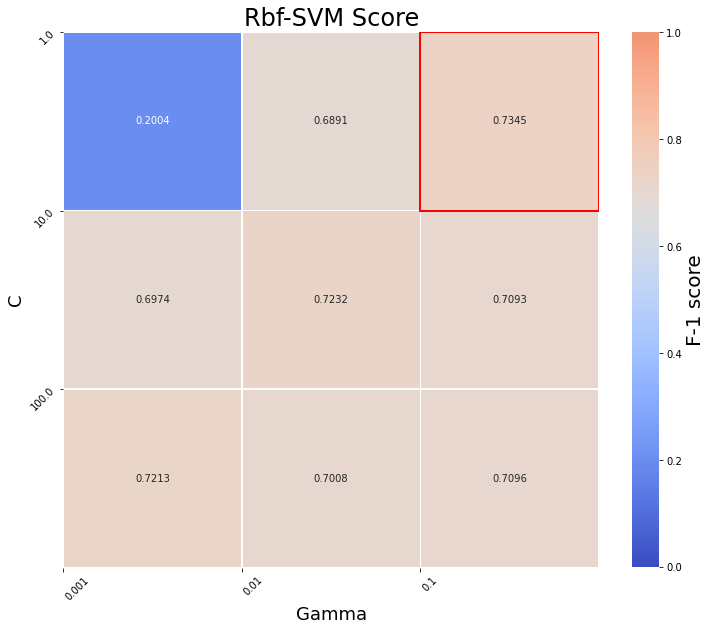

In [52]:
# print('running')
C_list = list(10. ** np.arange(0, 3))
gamma_list = list(10. ** np.arange(-3, 0))
F1_rbfsvm = np.zeros((len(C_list), len(gamma_list)))
F1_rbfsvm_best = 0
print('running')
#train and test

for i in range(len(C_list)):
    for j in range(len(gamma_list)):
        C=C_list[i]
        gamma=gamma_list[j]    
        rbfsvm = SVC(kernel= 'rbf', C=C, gamma=gamma, random_state=0)
        rbfsvm.fit(X_2_re, y_train)
        rbfsvm_pred = rbfsvm.predict(X_dev_2_re)
        #calculate F1
        print('When C= ', C, 'gamma=',gamma)
        F1_rbfsvm[i][j] = f1(rbfsvm_pred, y_dev, 'Rbf-SVM Classifier')

        if F1_rbfsvm[i,j] > F1_rbfsvm_best:
            F1_rbfsvm_best = F1_rbfsvm[i][j]
            rbfsvm_best_estimator = rbfsvm
            rbfsvm_bestC = C
            best_i = i
            rbfsvm_bestgamma = gamma
            best_j = j

print('Best C=',rbfsvm_bestC,'Best gamma=',rbfsvm_bestgamma,'best f1 score= ', F1_rbfsvm_best)
rbfsvm_heatpmap(gamma_list, C_list, F1_rbfsvm, best_i, best_j)